# Introduction

## What is Voting?

Voting is an ensemble learning method that aggregates the predictions of a multitude of individual models in order to make a prediction.

In Voting, each model can be different, meaning that for a classification task, an ensemble of logistic regression, decision tree, and naive Bayes can be used. Because the result is an aggregate of the results of each of the individual models, the overall result is more robust and does not suffer from the weaknesses of each individual model.

## Hard Voting


In hard voting, each individual model will predict the output and then the majority prediction will be the overall output. For example, if there are 3 models in the ensemble and they predict heads, heads, tails, the output of the voting ensemble will be heads.



## Soft Voting

In contrast to hard voting, the outputs of each of the individual models in soft voting is a probability. The final prediction of the soft voting ensemble is then the prediction with the highest averag probability. For example, if there are 4 models in the ensemble and 2 models predict it will rain with probability 0.4 and 0.5 respectively and 2 models predict sunshine with probability 0.5 and 0.5, then the prediction of the ensemble will be sunshine because it has a higher average probability.

# Code

In [ ]:
# !pip install -U imbalanced-learn
# !pip install pandas 
# !pip install sklearn
# !pip install numpy
# !pip install seaborn

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)


categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_numeric.drop(columns=['diabetes']) 
y = df_numeric['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

log_reg = LogisticRegression(random_state=42, class_weight={0: 1, 1: 2})
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight={0: 1, 1: 2})
naive_bayes = GaussianNB()  

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', decision_tree),
        ('nb', naive_bayes)
    ],
    voting='hard' 
)

voting_clf.fit(X_train_balanced, y_train_balanced)


y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.4f}')


Voting Classifier Accuracy: 0.7917


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

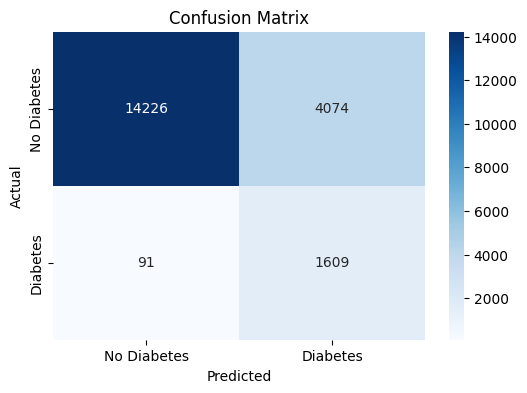

From the confusion matrix we can see that the model is quite accurate in predicting whether somebody as diabetes (correctly identifying if a person with diabetes has diabetes 94.6% of the time), While this is not as accurate as the random forest model, this voting classifier only has 3 models while the random forest has 100 (it has 100 decision tree estimators). The combination of 3 unique classifiers allows for an accurate model that is easier to train because it is smaller.